## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, \
                            recall_score, f1_score, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
from svm_margin_plot import plot_svm_boundary

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
df = pd.read_csv('mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [5]:
df.isnull().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

In [6]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


## Exploratory Data Analysis

<Axes: xlabel='Virus Present', ylabel='count'>

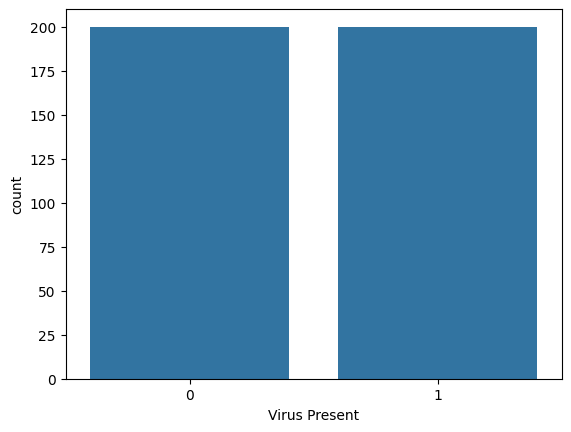

In [7]:
sns.countplot(data=df, x='Virus Present')

<Axes: >

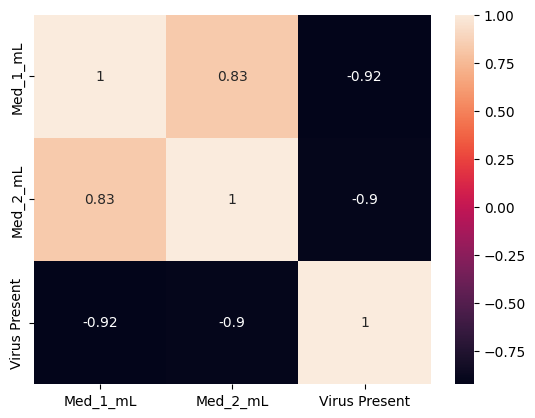

In [8]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

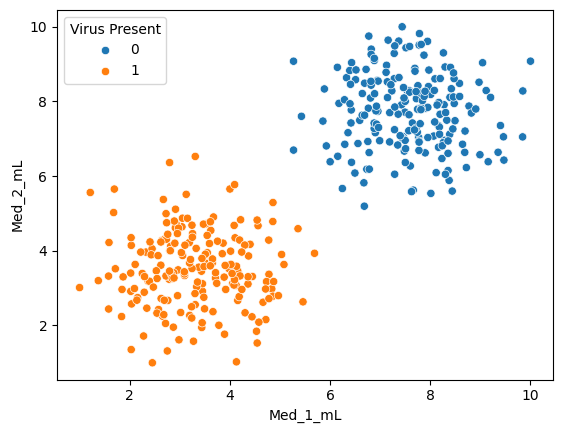

In [9]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')

### Creating Hyperplane

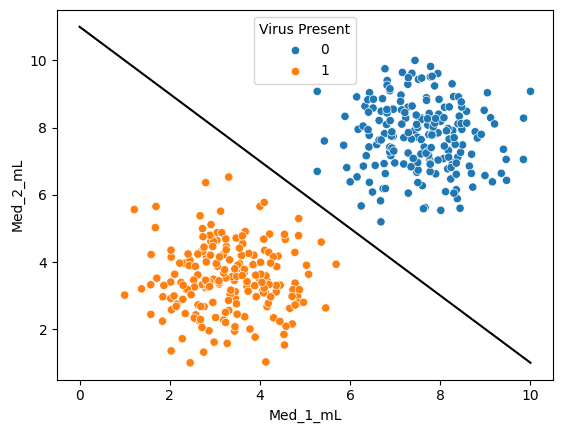

In [10]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b

plt.plot(x, y, 'black')

## Separating X and Y Variables

In [11]:
X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating Model

In [13]:
model = SVC(kernel='linear', C=1000)

In [14]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

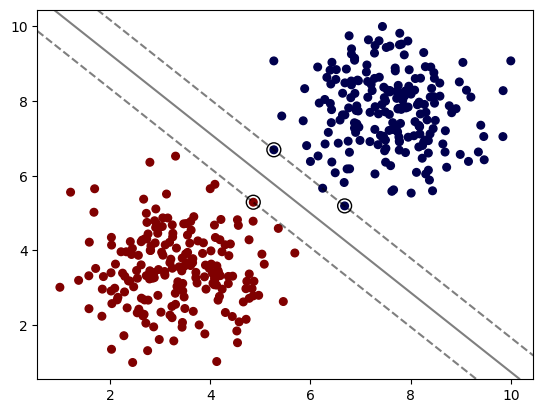

In [15]:
plot_svm_boundary(model, X, y)

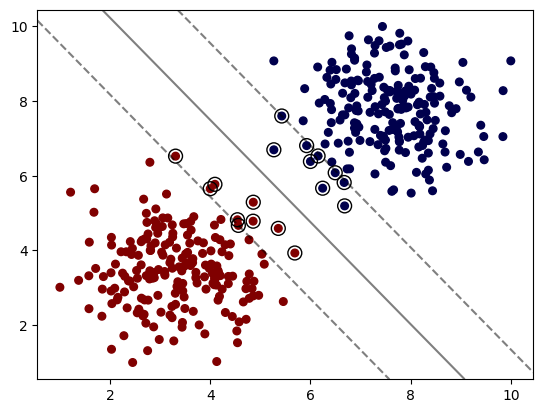

In [16]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)
plot_svm_boundary(model, X, y)

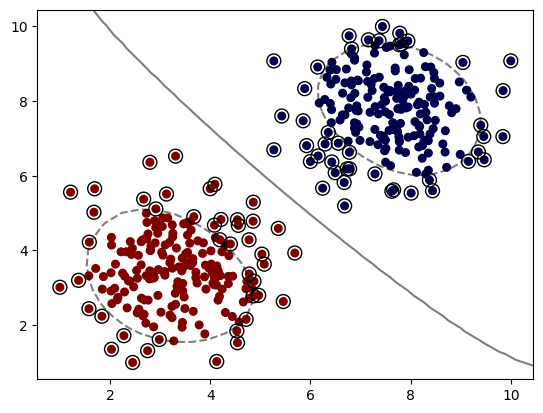

In [17]:
model = SVC(kernel='rbf', C=0.05)
model.fit(X, y)
plot_svm_boundary(model, X, y)

## Grid Model

In [18]:
C = [0.1, 1, 10, 100, 1000]
gamma = ['scale', 'auto']
kernel = ['rbf', 'linear']

In [19]:
param_grid = {'C':C, 'gamma':gamma, 'kernel':kernel}

In [20]:
grid_model = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')

In [21]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(C=0.05),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [22]:
grid_model.best_estimator_.get_params()

{'C': 0.1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Prediction and Evaluation

In [23]:
predictions = grid_model.predict(X_test)

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        38

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



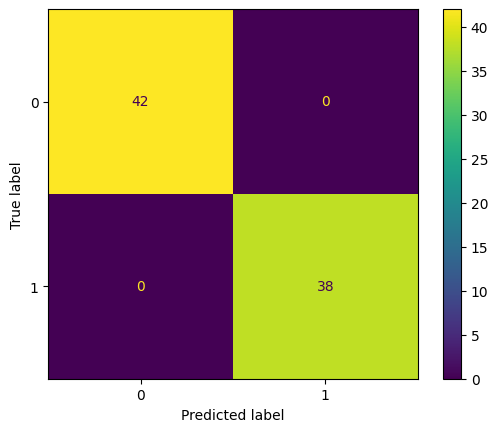

In [25]:
matrix = confusion_matrix(y_test, predictions)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix)
confusion_matrix_plot.plot()

In [26]:
print(f"Accuracy Score: {accuracy_score(y_test, predictions)}")
print(f"Precision Score: {precision_score(y_test, predictions)}")
print(f"Recall Score: {recall_score(y_test, predictions)}")
print(f"F1 Score: {f1_score(y_test, predictions)}")

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
